In [1]:
from bs4 import BeautifulSoup
import urllib.request as REQ
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib
import seaborn as sns
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False



In [2]:
jurl = 'https://rss.joins.com/joins_news_list.xml'
response = REQ.urlopen( jurl )
soup = BeautifulSoup( response, 'html.parser') #html.parser , html5lib
soup

C:\Users\CSYJ\anaconda3\envs\ml\lib\site-packages\bs4\builder\__init__.py:546: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  XMLParsedAsHTMLWarning.MESSAGE, XMLParsedAsHTMLWarning


<?xml version="1.0" encoding="utf-8" ?>
<rss version="2.0">
<channel>
<title>중앙일보 | 전체기사</title>
<link/>http://joongang.joins.com
		<language>ko</language>
<copyright>Copyright by JoongAng Ilbo Co., Ltd. All Rights Reserved</copyright>
<pubdate>2022-06-20 오후 7:26:07</pubdate>
<lastbuilddate>2022-06-20 오후 7:26:07</lastbuilddate>
<description>중앙일보 - 현장의 진실을 중앙에 두다.</description>
<image/>
<title>중앙일보</title>
<url>https://images.joins.com/common/rss08/JoongAngIlbo_CI_Signature.png</url>
<link/>http://joongang.joins.com
			
		<item>
<title><![CDATA[[포토] TXT, 더욱 성장된 모습으로 컴백!]]></title>
<link/><![CDATA[https://news.joins.com/article/24232833?cloc=rss-news-total_list]]>
<description><![CDATA[그룹 투모로우바이투게더가 9일 오후 서울 광진구 예스24 라이브홀에서 열린 미니 4집 ‘미니소드2: 써스데이 차일드’ 쇼케이스에서 멋진 무대를 펼치고 있다. TXT의 미니 4집 ‘미니소드2: 써스데이 차일드’의 타이틀곡 ‘Good Boy Gone Bad’은 첫사랑이 깨진 뒤 순수했던 소년이 분노와 상실의 감정에 휩싸이게 되는 ]]></description>
<author><![CDATA[ ]]></author>
<pubdate>2022-05-09T16:07:44+09:00</pubdate>
</item>
<item>
<title><![CDATA

In [3]:
kurl ='http://www.weather.go.kr/weather/forecast/mid-term-rss3.jsp?stnId=109'
kresponse = REQ.urlopen( kurl )
ksoup = BeautifulSoup( kresponse, 'html.parser') #html.parser , html5lib
ksoup

<?xml version="1.0" encoding="utf-8" ?>
<rss version="2.0">
<channel>
<title>기상청 육상 중기예보</title>
<link/>http://www.kma.go.kr/weather/forecast/mid-term_02.jsp
<description>기상청 날씨 웹서비스</description>
<language>ko</language>
<generator>기상청</generator>
<pubdate>2022년 06월 20일 (월)요일 18:00</pubdate>
<item>
<author>기상청</author>
<category>육상중기예보</category>
<title>서울,경기도 육상 중기예보 - 2022년 06월 20일 (월)요일 18:00 발표</title>
<link/>http://www.kma.go.kr/weather/forecast/mid-term_02.jsp
<guid>http://www.kma.go.kr/weather/forecast/mid-term_02.jsp</guid>
<description>
<header>
<title>서울,경기도 육상중기예보</title>
<tm>202206201800</tm>
<wf><![CDATA[○ (강수) 24일(금) 오전, 28일(화)~29일(수)은 비가 오겠습니다. <br />○ (기온) 이번 예보기간 아침 기온은 19~23도, 낮 기온은 25~31도로 오늘(20일, 아침최저기온 20~22도, 낮최고기온 27~30도)과 비슷하거나 조금 낮겠습니다. <br />○ (해상) 서해중부해상의 물결은 24일(금)과 28일(화)~29일(수)은 1.0~2.5m로 일겠고, 그 밖의 날은 1.0~2.0m로 일겠습니다.<br />○ (주말전망) 25일(토)~26일(일)은 대체로 흐리겠습니다. 아침 기온은 19~22도, 낮 기온은 26~31도가 되겠습니다. <br /><br />* 이번 예보기간에는 정체전선의 위치에 따라 강수 구역이 변동될 수 있으며, 정체전선의 영향

In [4]:
for location in ksoup.select('location'):
    print(location.city.string)

서울
인천
수원
파주
이천
평택
백령도
과천
광명
강화
김포
시흥
안산
부천
의정부
고양
양주
동두천
연천
포천
가평
구리
남양주
양평
하남
안양
오산
화성
성남
의왕
군포
안성
용인
광주
여주


In [5]:
for location in ksoup.select('location'):
    print(location.city.string)
    print("======================")
    for data in location.select('data'):
        print('날짜:',  data.tmef.string )
        print('날씨 : ',data.wf.string)
        print('최저 : ',data.tmn.text)
        print('최고 : ',data.tmx.text)
        print("--------------------------")

서울
날짜: 2022-06-23 00:00
날씨 :  흐리고 비
최저 :  22
최고 :  26
--------------------------
날짜: 2022-06-23 12:00
날씨 :  흐리고 비
최저 :  22
최고 :  26
--------------------------
날짜: 2022-06-24 00:00
날씨 :  흐리고 비
최저 :  22
최고 :  27
--------------------------
날짜: 2022-06-24 12:00
날씨 :  흐림
최저 :  22
최고 :  27
--------------------------
날짜: 2022-06-25 00:00
날씨 :  흐림
최저 :  21
최고 :  28
--------------------------
날짜: 2022-06-25 12:00
날씨 :  흐림
최저 :  21
최고 :  28
--------------------------
날짜: 2022-06-26 00:00
날씨 :  구름많음
최저 :  22
최고 :  29
--------------------------
날짜: 2022-06-26 12:00
날씨 :  구름많음
최저 :  22
최고 :  29
--------------------------
날짜: 2022-06-27 00:00
날씨 :  흐림
최저 :  22
최고 :  28
--------------------------
날짜: 2022-06-27 12:00
날씨 :  흐림
최저 :  22
최고 :  28
--------------------------
날짜: 2022-06-28 00:00
날씨 :  흐리고 비
최저 :  22
최고 :  28
--------------------------
날짜: 2022-06-29 00:00
날씨 :  흐리고 비
최저 :  22
최고 :  27
--------------------------
날짜: 2022-06-30 00:00
날씨 :  흐림
최저 :  22
최고 :  27
--------------------------
인천


In [6]:
kList = []
for location in ksoup.select('location'):
    for data in location.select('data'):
        kList.append( {'도시':location.city.string,
                      '날짜':data.tmef.string,
                      '날씨':data.wf.string,
                      '최저':int(data.tmn.string),
                      '최고':int(data.tmx.string)}  )
kList


[{'도시': '서울', '날짜': '2022-06-23 00:00', '날씨': '흐리고 비', '최저': 22, '최고': 26},
 {'도시': '서울', '날짜': '2022-06-23 12:00', '날씨': '흐리고 비', '최저': 22, '최고': 26},
 {'도시': '서울', '날짜': '2022-06-24 00:00', '날씨': '흐리고 비', '최저': 22, '최고': 27},
 {'도시': '서울', '날짜': '2022-06-24 12:00', '날씨': '흐림', '최저': 22, '최고': 27},
 {'도시': '서울', '날짜': '2022-06-25 00:00', '날씨': '흐림', '최저': 21, '최고': 28},
 {'도시': '서울', '날짜': '2022-06-25 12:00', '날씨': '흐림', '최저': 21, '최고': 28},
 {'도시': '서울', '날짜': '2022-06-26 00:00', '날씨': '구름많음', '최저': 22, '최고': 29},
 {'도시': '서울', '날짜': '2022-06-26 12:00', '날씨': '구름많음', '최저': 22, '최고': 29},
 {'도시': '서울', '날짜': '2022-06-27 00:00', '날씨': '흐림', '최저': 22, '최고': 28},
 {'도시': '서울', '날짜': '2022-06-27 12:00', '날씨': '흐림', '최저': 22, '최고': 28},
 {'도시': '서울', '날짜': '2022-06-28 00:00', '날씨': '흐리고 비', '최저': 22, '최고': 28},
 {'도시': '서울', '날짜': '2022-06-29 00:00', '날씨': '흐리고 비', '최저': 22, '최고': 27},
 {'도시': '서울', '날짜': '2022-06-30 00:00', '날씨': '흐림', '최저': 22, '최고': 27},
 {'도시': '인천', '날짜': '2022-06-23 

In [7]:
kdf = pd.DataFrame( kList)
kdf

,도시,날짜,날씨,최저,최고
0,서울,2022-06-23 00:00,흐리고 비,22,26
1,서울,2022-06-23 12:00,흐리고 비,22,26
2,서울,2022-06-24 00:00,흐리고 비,22,27
3,서울,2022-06-24 12:00,흐림,22,27
4,서울,2022-06-25 00:00,흐림,21,28
...,...,...,...,...,...
450,여주,2022-06-27 00:00,흐림,22,28
451,여주,2022-06-27 12:00,흐림,22,28
452,여주,2022-06-28 00:00,흐리고 비,22,29
453,여주,2022-06-29 00:00,흐리고 비,22,28


In [8]:
#1. 도시와 날짜를 인덱스로 설정하시오

kdf.set_index(['도시','날짜'], inplace=True)

In [9]:
kdf

날씨  최저  최고
도시 날짜                             
서울 2022-06-23 00:00  흐리고 비  22  26
   2022-06-23 12:00  흐리고 비  22  26
   2022-06-24 00:00  흐리고 비  22  27
   2022-06-24 12:00     흐림  22  27
   2022-06-25 00:00     흐림  21  28
...                    ...  ..  ..
여주 2022-06-27 00:00     흐림  22  28
   2022-06-27 12:00     흐림  22  28
   2022-06-28 00:00  흐리고 비  22  29
   2022-06-29 00:00  흐리고 비  22  28
   2022-06-30 00:00     흐림  22  29

[455 rows x 3 columns]

In [10]:
#2. 도시별 최고, 최저기온 평균을 구하시오
kdf.groupby('도시')[['최저', '최고']].mean()

,최저,최고
도시,,
가평,20.307692,28.307692
강화,20.076923,26.153846
고양,20.923077,28.769231
과천,21.307692,28.615385
광명,22.153846,28.000000
광주,21.230769,27.923077
구리,22.000000,28.923077
군포,21.615385,27.615385
김포,21.461538,27.769231


In [11]:
#3. '흐림'이 오는 도시 날짜 날씨를 구하시오
kdf[kdf['날씨']=='흐림'][['날씨']]

날씨
도시 날짜                  
서울 2022-06-24 12:00  흐림
   2022-06-25 00:00  흐림
   2022-06-25 12:00  흐림
   2022-06-27 00:00  흐림
   2022-06-27 12:00  흐림
...                  ..
여주 2022-06-25 00:00  흐림
   2022-06-25 12:00  흐림
   2022-06-27 00:00  흐림
   2022-06-27 12:00  흐림
   2022-06-30 00:00  흐림

[210 rows x 1 columns]

In [12]:
#4. 최저기온이 가장낮은 도시, 날짜, 최고기온을 구하시오
kdf[kdf['최저'] == kdf['최저'].min()]['최고']

도시   날짜              
백령도  2022-06-24 00:00    22
     2022-06-24 12:00    22
     2022-06-25 00:00    23
     2022-06-25 12:00    23
     2022-06-26 00:00    24
     2022-06-26 12:00    24
Name: 최고, dtype: int64

In [18]:
 
#5. 도시를 입력받아 해당도시 데이터를 구하시오
#도시입력:
# 날짜  날씨 최고  최저

x = input('도시입력:')

도시입력:여주


In [20]:
def do():
    return kdf.loc[x]

do()

,날씨,최저,최고
날짜,,,
2022-06-23 00:00,흐리고 비,21,27
2022-06-23 12:00,흐리고 비,21,27
2022-06-24 00:00,흐리고 비,22,27
2022-06-24 12:00,흐림,22,27
2022-06-25 00:00,흐림,20,28
2022-06-25 12:00,흐림,20,28
2022-06-26 00:00,구름많음,20,30
2022-06-26 12:00,구름많음,20,30
2022-06-27 00:00,흐림,22,28


In [26]:
#6. 느낌 컬럼을 추가하고 최고기온에 따라 다음과 같이 표시하시오
# 28 도 이상면: 매우 더움
# 25 ~ 27 면: 더움
# 나머지 : 보통

lst = []

for i in kdf['최고']:
    if i >= 28:
        lst.append('매우더움')
    elif i>= 25 and i<= 27 :
        lst.append('더움')
    else:
        lst.append('보통')

kdf['느낌'] = lst

kdf

        

날씨  최저  최고    느낌
도시 날짜                                   
서울 2022-06-23 00:00  흐리고 비  22  26    더움
   2022-06-23 12:00  흐리고 비  22  26    더움
   2022-06-24 00:00  흐리고 비  22  27    더움
   2022-06-24 12:00     흐림  22  27    더움
   2022-06-25 00:00     흐림  21  28  매우더움
...                    ...  ..  ..   ...
여주 2022-06-27 00:00     흐림  22  28  매우더움
   2022-06-27 12:00     흐림  22  28  매우더움
   2022-06-28 00:00  흐리고 비  22  29  매우더움
   2022-06-29 00:00  흐리고 비  22  28  매우더움
   2022-06-30 00:00     흐림  22  29  매우더움

[455 rows x 4 columns]

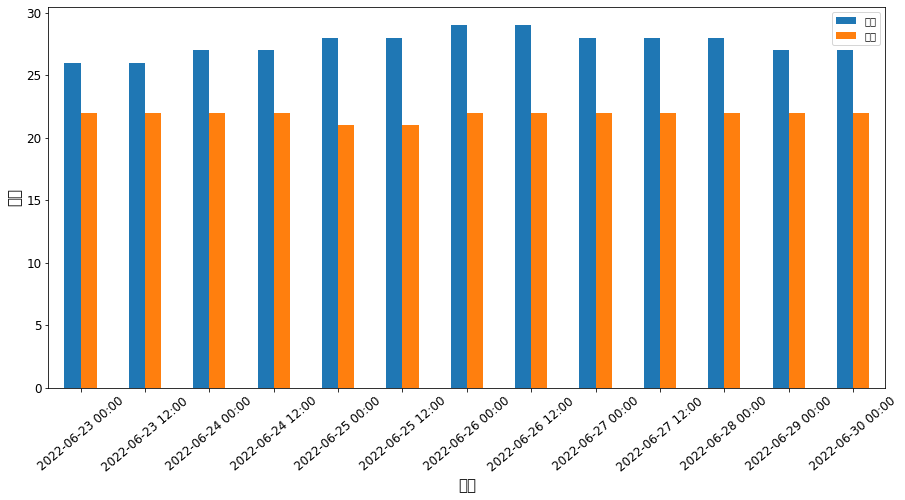

In [43]:
 #7. 서울지역의 날짜별 최고 최저기온을 바차트로 그리시오

kdf.loc['서울', ['최고', '최저']].plot(kind='bar', figsize=(15,7), rot=40)
plt.xlabel('날짜')
plt.ylabel('기온')


plt.show()


In [57]:
#8. 여주지역 최저기온이 22 도 이하인데이터를 구하시오

kdf.loc['여주'][kdf.loc['여주','최저'] < 22]


,날씨,최저,최고,느낌
날짜,,,,
2022-06-23 00:00,흐리고 비,21,27,더움
2022-06-23 12:00,흐리고 비,21,27,더움
2022-06-25 00:00,흐림,20,28,매우더움
2022-06-25 12:00,흐림,20,28,매우더움
2022-06-26 00:00,구름많음,20,30,매우더움
2022-06-26 12:00,구름많음,20,30,매우더움


In [94]:
 #9. 여주지역 전체 최고기온 중 최고기온이 29 도 이상이 차지하는비율을 구하시오
# (예를들어  출력결과:29도이상 15% )


a = kdf.loc['여주', '최고'] >= 28

a.value_counts(normalize = True)[1]



0.6923076923076923

In [103]:
#10. 일교차 컬럼을 추가하고,최고기온과 최저기온의 차이가 가장높은 도시,날짜,최저,최고,일교차를 구하시오

kdf['일교차'] = kdf['최고'] - kdf['최저']

kdf.loc[kdf['일교차'].idxmax()[0]]


,날씨,최저,최고,느낌,일교차
날짜,,,,,
2022-06-23 00:00,흐리고 비,20,27,더움,7
2022-06-23 12:00,흐리고 비,20,27,더움,7
2022-06-24 00:00,흐리고 비,21,29,매우더움,8
2022-06-24 12:00,흐림,21,29,매우더움,8
2022-06-25 00:00,흐림,19,28,매우더움,9
2022-06-25 12:00,흐림,19,28,매우더움,9
2022-06-26 00:00,구름많음,19,30,매우더움,11
2022-06-26 12:00,구름많음,19,30,매우더움,11
2022-06-27 00:00,흐림,21,28,매우더움,7
